# Initialisierung

In [1]:
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import display, Markdown

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [3]:
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")
ip = pd.read_csv(DATASET_DIR / "2. Datenaufbereitung" / "pa_ip.csv")
description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [4]:
description.loc[description['Table']=="installments_payments.csv", "Row":"Special"]

Row  \
214             SK_ID_PREV    
215              SK_ID_CURR   
216  NUM_INSTALMENT_VERSION   
217   NUM_INSTALMENT_NUMBER   
218         DAYS_INSTALMENT   
219      DAYS_ENTRY_PAYMENT   
220          AMT_INSTALMENT   
221             AMT_PAYMENT   

                                                                                                                                                                                    Description  \
214                                           ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)   
215                                                                                                                                                                    ID of loan in our sample   
216  Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed   
217                                                                                                                                                     On which installment we observe payment   
218                                                                              When the installment of previous credit was supposed to be paid (relative to application date of current loan)   
219                                                                                   When was the installments of previous credit paid actually (relative to application date of current loan)   
220                                                                                                           What was the prescribed installment amount of previous credit on this installment   
221                                                                                                                        What the client actually paid on previous credit on this installment   

                                   Special  
214                                 hashed  
215                                 hashed  
216                                    NaN  
217                                    NaN  
218  time only relative to the application  
219  time only relative to the application  
220                                    NaN  
221                                    NaN

# Datenaufbereitung

In [5]:
# Schnittmenge zwischen app_train und bureau
# Ergänzt die Variable "TARGET" in dem bureau-Datensatz
ip = pd.merge(ip, app_train[["SK_ID_CURR","TARGET"]] ,on="SK_ID_CURR")

# Austausch der numerischen Kategorien durch sprechende, interpretierbare Variablen
ip["TARGET"].replace(
    {
        0: "Payback",
        1: "Default"
    }, inplace = True
)

In [6]:
ip.head()

SK_ID_CURR  PA_CNT_CREDITS  PA_IP_PAYMENT_30  PA_IP_DAYS_DIFF_30  \
0      252457               1     -9.128709e-01                 0.0   
1      256657               2      2.041241e-01                -6.0   
2      198678               2      4.540312e-08               -20.0   
3      394447               2      5.295619e-01                -0.5   
4      156331               2     -7.381905e-01                 0.0   

   PA_IP_AMT_DIFF_30  PA_IP_PAYMENT_60  PA_IP_DAYS_DIFF_60  PA_IP_AMT_DIFF_60  \
0                0.0      9.128709e-01               -15.0                0.0   
1                0.0      2.041241e-01               -13.0                0.0   
2                0.0      4.540312e-08               -21.5                0.0   
3                0.0      6.115381e-01                -7.0                0.0   
4                0.0      1.416426e-02                 0.0                0.0   

   PA_IP_PAYMENT_90  PA_IP_DAYS_DIFF_90  PA_IP_AMT_DIFF_90  PA_IP_PAYMENT_120  \
0      9.128709e-01               -17.0                0.0           0.912871   
1      2.041241e-01               -12.0                0.0           0.204124   
2      4.540312e-08                -6.5                0.0          -0.000407   
3     -3.183548e-01                -7.0                0.0          -0.229629   
4      1.416426e-02                 0.0                0.0          -1.114368   

   PA_IP_DAYS_DIFF_120  PA_IP_AMT_DIFF_120  PA_IP_PAYMENT_150  \
0                -14.0                 0.0          -0.912871   
1                -12.5                 0.0           0.204124   
2                 -1.0                 0.0           0.000204   
3                 -6.5                 0.0          -0.180184   
4                 -1.0                 0.0           1.207845   

   PA_IP_DAYS_DIFF_150  PA_IP_AMT_DIFF_150  PA_IP_PAYMENT_180  \
0                  0.0                 0.0          -0.912871   
1                -13.0                 0.0          -1.020621   
2                  0.5                 0.0           0.000204   
3                 -8.5                 0.0          -0.412932   
4                -12.5                 0.0           0.616385   

   PA_IP_DAYS_DIFF_180  PA_IP_AMT_DIFF_180  PA_AMT_ANNUITY  \
0                  0.0                 0.0        4951.350   
1                 -1.5                 0.0       49054.770   
2                 -0.5                 0.0       98806.050   
3                  0.0                 0.0       17141.445   
4                 -5.0                 0.0       40866.795   

   PA_AMT_APPLICATION  PA_AMT_CREDIT  PA_AMT_DOWN_PAYMENT  PA_AMT_GOODS_PRICE  \
0           47056.275        52641.0                4.275           47056.275   
1          978570.000      1198062.0            15714.000          978570.000   
2          921721.500       941661.0            13347.000          921721.500   
3          129132.000       129132.0                0.000          129132.000   
4          793035.000       793035.0                0.000          793035.000   

   PA_RATE_DOWN_PAYMENT  PA_CNT_NAME_CONTRACT_TYPE_Revolving loans  \
0              0.000088                                        1.0   
1              0.217818                                        2.0   
2              0.193358                                        0.0   
3              0.000000                                        1.0   
4              0.000000                                        2.0   

   PA_CNT_NAME_CONTRACT_STATUS_Refused  PA_CNT_CODE_REJECT_REASON_HC  \
0                                  0.0                           0.0   
1                                  7.0                           5.0   
2                                  0.0                           0.0   
3                                  0.0                           0.0   
4                                  0.0                           0.0   

   PA_CNT_NAME_CLIENT_TYPE_New  PA_CNT_NAME_CLIENT_TYPE_Refreshed  \
0                          0.0       

# Datenanalyse

In [7]:
payment = ip[["PA_IP_PAYMENT_30","PA_IP_PAYMENT_60","PA_IP_PAYMENT_90","PA_IP_PAYMENT_120","PA_IP_PAYMENT_150","PA_IP_PAYMENT_180"]].copy()
amount = ip[["PA_IP_AMT_DIFF_30","PA_IP_AMT_DIFF_60","PA_IP_AMT_DIFF_90","PA_IP_AMT_DIFF_120","PA_IP_AMT_DIFF_150","PA_IP_AMT_DIFF_180"]].copy()
days = ip[["PA_IP_DAYS_DIFF_30","PA_IP_DAYS_DIFF_60","PA_IP_DAYS_DIFF_90","PA_IP_DAYS_DIFF_120","PA_IP_DAYS_DIFF_150","PA_IP_DAYS_DIFF_180"]].copy()

In [8]:
ip["sigma"] = payment.std(axis=1)
ip["sigmaII"] = amount.std(axis=1)
ip["sigmaIII"] = days.std(axis=1)

In [9]:
ip.head()

SK_ID_CURR  PA_CNT_CREDITS  PA_IP_PAYMENT_30  PA_IP_DAYS_DIFF_30  \
0      252457               1     -9.128709e-01                 0.0   
1      256657               2      2.041241e-01                -6.0   
2      198678               2      4.540312e-08               -20.0   
3      394447               2      5.295619e-01                -0.5   
4      156331               2     -7.381905e-01                 0.0   

   PA_IP_AMT_DIFF_30  PA_IP_PAYMENT_60  PA_IP_DAYS_DIFF_60  PA_IP_AMT_DIFF_60  \
0                0.0      9.128709e-01               -15.0                0.0   
1                0.0      2.041241e-01               -13.0                0.0   
2                0.0      4.540312e-08               -21.5                0.0   
3                0.0      6.115381e-01                -7.0                0.0   
4                0.0      1.416426e-02                 0.0                0.0   

   PA_IP_PAYMENT_90  PA_IP_DAYS_DIFF_90  PA_IP_AMT_DIFF_90  PA_IP_PAYMENT_120  \
0      9.128709e-01               -17.0                0.0           0.912871   
1      2.041241e-01               -12.0                0.0           0.204124   
2      4.540312e-08                -6.5                0.0          -0.000407   
3     -3.183548e-01                -7.0                0.0          -0.229629   
4      1.416426e-02                 0.0                0.0          -1.114368   

   PA_IP_DAYS_DIFF_120  PA_IP_AMT_DIFF_120  PA_IP_PAYMENT_150  \
0                -14.0                 0.0          -0.912871   
1                -12.5                 0.0           0.204124   
2                 -1.0                 0.0           0.000204   
3                 -6.5                 0.0          -0.180184   
4                 -1.0                 0.0           1.207845   

   PA_IP_DAYS_DIFF_150  PA_IP_AMT_DIFF_150  PA_IP_PAYMENT_180  \
0                  0.0                 0.0          -0.912871   
1                -13.0                 0.0          -1.020621   
2                  0.5                 0.0           0.000204   
3                 -8.5                 0.0          -0.412932   
4                -12.5                 0.0           0.616385   

   PA_IP_DAYS_DIFF_180  PA_IP_AMT_DIFF_180  PA_AMT_ANNUITY  \
0                  0.0                 0.0        4951.350   
1                 -1.5                 0.0       49054.770   
2                 -0.5                 0.0       98806.050   
3                  0.0                 0.0       17141.445   
4                 -5.0                 0.0       40866.795   

   PA_AMT_APPLICATION  PA_AMT_CREDIT  PA_AMT_DOWN_PAYMENT  PA_AMT_GOODS_PRICE  \
0           47056.275        52641.0                4.275           47056.275   
1          978570.000      1198062.0            15714.000          978570.000   
2          921721.500       941661.0            13347.000          921721.500   
3          129132.000       129132.0                0.000          129132.000   
4          793035.000       793035.0                0.000          793035.000   

   PA_RATE_DOWN_PAYMENT  PA_CNT_NAME_CONTRACT_TYPE_Revolving loans  \
0              0.000088                                        1.0   
1              0.217818                                        2.0   
2              0.193358                                        0.0   
3              0.000000                                        1.0   
4              0.000000                                        2.0   

   PA_CNT_NAME_CONTRACT_STATUS_Refused  PA_CNT_CODE_REJECT_REASON_HC  \
0                                  0.0                           0.0   
1                                  7.0                           5.0   
2                                  0.0                           0.0   
3                                  0.0                           0.0   
4                                  0.0                           0.0   

   PA_CNT_NAME_CLIENT_TYPE_New  PA_CNT_NAME_CLIENT_TYPE_Refreshed  \
0                          0.0       

In [10]:
payback = ip[ip["TARGET"] == "Payback"]
default = ip[ip["TARGET"] == "Default"]

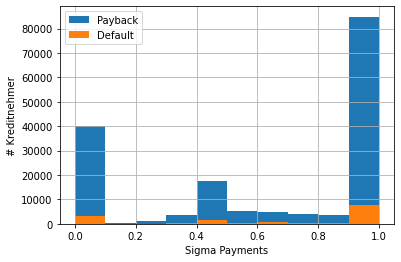

In [11]:
head = "sigma"

pb = payback[head].copy()
df = default[head].copy()

pb.hist()
df.hist()

plt.legend(labels=["Payback","Default"])
plt.xlabel("Sigma Payments")
plt.ylabel("# Kreditnehmer")
plt.show()

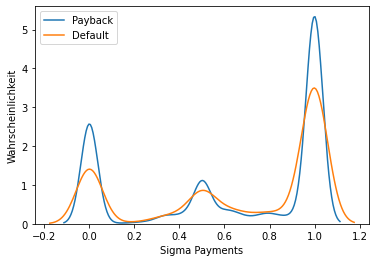

In [12]:
head = "sigma"

pb = payback[head].copy()
df = default[head].copy()

sns.kdeplot(pb)
sns.kdeplot(df)

plt.legend(labels=["Payback","Default"])
plt.xlabel("Sigma Payments")
plt.ylabel("Wahrscheinlichkeit")
plt.show()

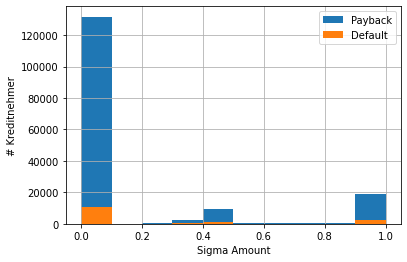

In [13]:
head = "sigmaII"

pb = payback[head].copy()
df = default[head].copy()

pb.hist()
df.hist()

plt.legend(labels=["Payback","Default"])
plt.xlabel("Sigma Amount")
plt.ylabel("# Kreditnehmer")
plt.show()

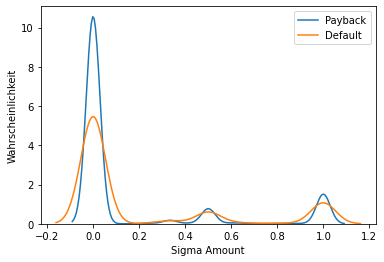

In [14]:
head = "sigmaII"

pb = payback[head].copy()
df = default[head].copy()

sns.kdeplot(pb)
sns.kdeplot(df)

plt.legend(labels=["Payback","Default"])
plt.xlabel("Sigma Amount")
plt.ylabel("Wahrscheinlichkeit")
plt.show()

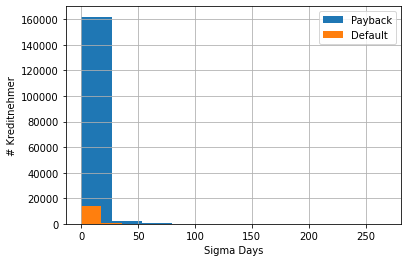

In [15]:
head = "sigmaIII"

pb = payback[head].copy()
df = default[head].copy()

pb.hist()
df.hist()

plt.legend(labels=["Payback","Default"])
plt.xlabel("Sigma Days")
plt.ylabel("# Kreditnehmer")
plt.show()

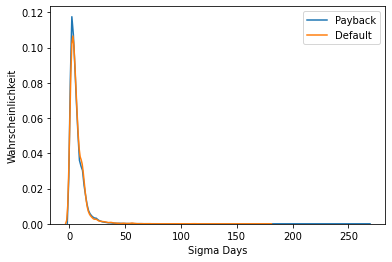

In [16]:
head = "sigmaIII"

pb = payback[head].copy()
df = default[head].copy()

sns.kdeplot(pb)
sns.kdeplot(df)

plt.legend(labels=["Payback","Default"])
plt.xlabel("Sigma Days")
plt.ylabel("Wahrscheinlichkeit")
plt.show()